## MSDS 460 Business analytics: Assignment 4 Applying Monte Carlo Simulation to a bench mark study comparing Python and GO languages.
### By Hannah Graham hannahrg24@gmail.com Fall 2024

In [73]:
import pandas as pd
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import string
import re


#### define test functions to run MC on for all use cases (mathematical and string operations)

In [74]:
# Determine mathematical functions to run simulation on


def add(a, b):
    return a + b

def multiply(a, b):
    return a * b

def exponent(a, b):
    return a ** b

def sqrt(a, b):
    return b * np.sqrt(a)

def matrix_multiply(a, b):
    return np.dot(a, b)

# String functions to be used in simulation

def generate_random_string(length):
    return ''.join(random.choices(string.ascii_lowercase + string.digits, k=length))

def concatenate_strings(a, b):
    return a + b

def search_substring(s,sub):
    return sub in s

def regex_match(s, pattern):
    return re.search(pattern, s)


In [75]:
# define monte carlo simulation function for mathematical operations

def monte_carlo_simulation(num_sample, matrix_size):
    add_times = []
    multiply_times = []
    exponent_times = []
    sqrt_times = []
    matrix_multiply_times = []


    for i in range(num_sample):
        a = random.random()
        b = random.random()
        A = np.random.rand(matrix_size, matrix_size)
        B = np.random.rand(matrix_size, matrix_size)

        start_time = time.time()
        add(a, b)
        add_times.append(time.time() - start_time)

        start_time = time.time()
        multiply(a, b)
        multiply_times.append(time.time() - start_time)
        
        start_time = time.time()
        exponent(a, b) 
        exponent_times.append(time.time() - start_time)

        start_time = time.time()
        sqrt(a, b)
        sqrt_times.append(time.time() - start_time)

        start_time = time.time()
        matrix_multiply(A, B)
        matrix_multiply_times.append(time.time() - start_time)

        

    return add_times, multiply_times, exponent_times, sqrt_times, matrix_multiply_times

In [ ]:
# call monte carlo simulation function for mathematical operations

num_samples = 100000
matrix_size = 10 
add_times, multiply_times, exponent_times, sqrt_times, matrix_multiply_times = monte_carlo_simulation(num_samples, matrix_size)


print(f"Average Addition Time: {sum(add_times) / num_samples} seconds")
print(f"Average Multiplication Time: {sum(multiply_times) / num_samples} seconds")
print(f"Average Exponentiation Time: {sum(exponent_times) / num_samples} seconds")
print(f"Average Square Root Time: {sum(sqrt_times) / num_samples} seconds")
print(f"Average Matrix Multiplication Time: {sum(matrix_multiply_times) / num_samples} seconds")

# create dataframe to store results
results_df = pd.DataFrame({
    'Operation': ['Addition', 'Multiplication', 'Exponentiation', 'Square Root', 'Matrix Multiplication'],
    'Average Time (seconds)': [
        sum(add_times) / num_samples,
        sum(multiply_times) / num_samples,
        sum(exponent_times) / num_samples,
        sum(sqrt_times) / num_samples,
        sum(matrix_multiply_times) / num_samples
    ]
})

# print(results_df)
results_df.to_csv('PythonMathResults.csv', index=False)

Average Addition Time: 7.673025131225586e-08 seconds
Average Multiplication Time: 2.496790885925293e-07 seconds
Average Exponentiation Time: 2.0070075988769532e-08 seconds
Average Square Root Time: 5.742049217224121e-07 seconds
Average Matrix Multiplication Time: 8.51142406463623e-07 seconds
               Operation  Average Time (seconds)
0               Addition            7.673025e-08
1         Multiplication            2.496791e-07
2         Exponentiation            2.007008e-08
3            Square Root            5.742049e-07
4  Matrix Multiplication            8.511424e-07


In [77]:
# define monte carlo simulation function for string operations

def monte_carlo_simulation_string(num_sample, string_length):
    concatenate_times = []
    search_times = []
    regex_times = []

    for i in range(num_sample):
        a = generate_random_string(string_length)
        b = generate_random_string(string_length)
        sub = generate_random_string(int(string_length/2))
        pattern = generate_random_string(int(string_length/2))

        start_time = time.time()
        concatenate_strings(a, b)
        concatenate_times.append(time.time() - start_time)

        start_time = time.time()
        search_substring(a, sub)
        search_times.append(time.time() - start_time)

        start_time = time.time()
        regex_match(a, pattern)
        regex_times.append(time.time() - start_time)

    return concatenate_times, search_times, regex_times

In [78]:
# call monte carlo for string manipulation simulations

num_samples = 100000
string_length = 1000
concatenate_times, search_times, regex_times = monte_carlo_simulation_string(num_samples, string_length)

StringResults_df = pd.DataFrame({
    'Operation': ['Concatenate', 'Search Substring', 'Regex Match'],
    'Average Time (seconds)': [
        sum(concatenate_times) / num_samples,
        sum(search_times) / num_samples,
        sum(regex_times) / num_samples
    ]
})

print(StringResults_df)

          Operation  Average Time (seconds)
0       Concatenate            9.195566e-08
1  Search Substring            5.780411e-07
2       Regex Match            2.408423e-04


Results:

Plot python and go results for all simulation cases

In [79]:
#concat math and string results
PythonResults_df = pd.concat([results_df, StringResults_df], axis=0)
PythonResults_df.to_csv('StringandMathPythonResults.csv', index=False)

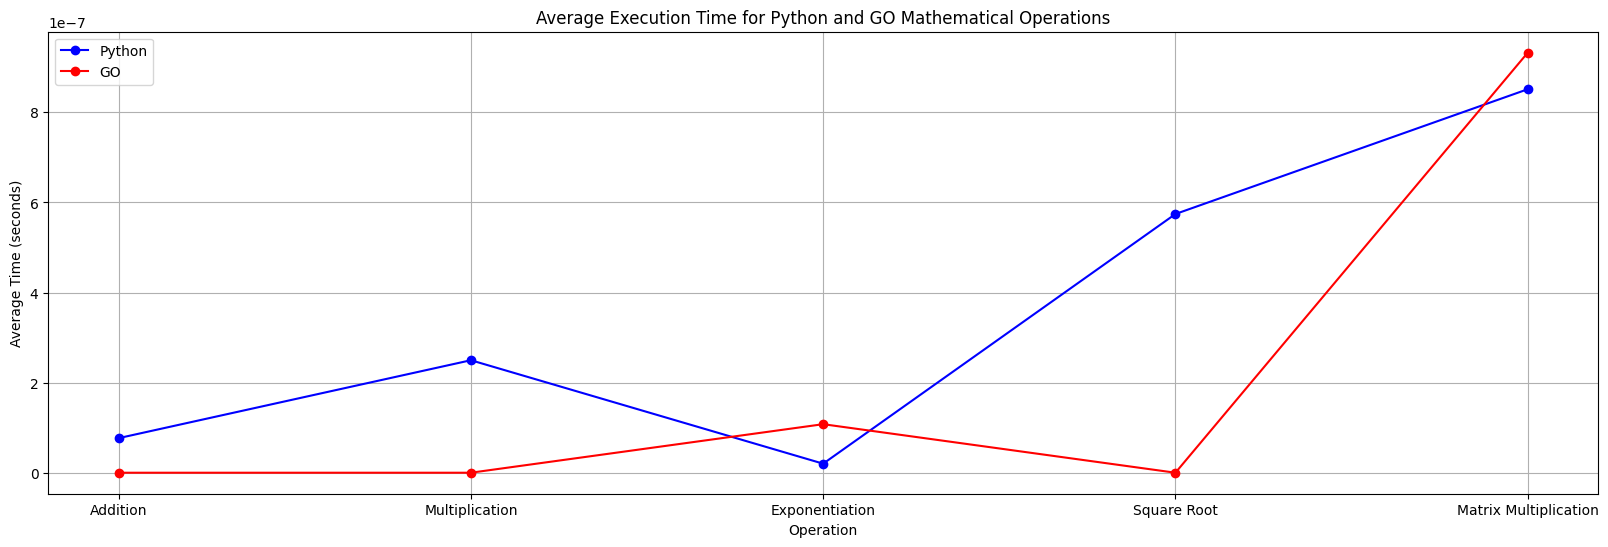

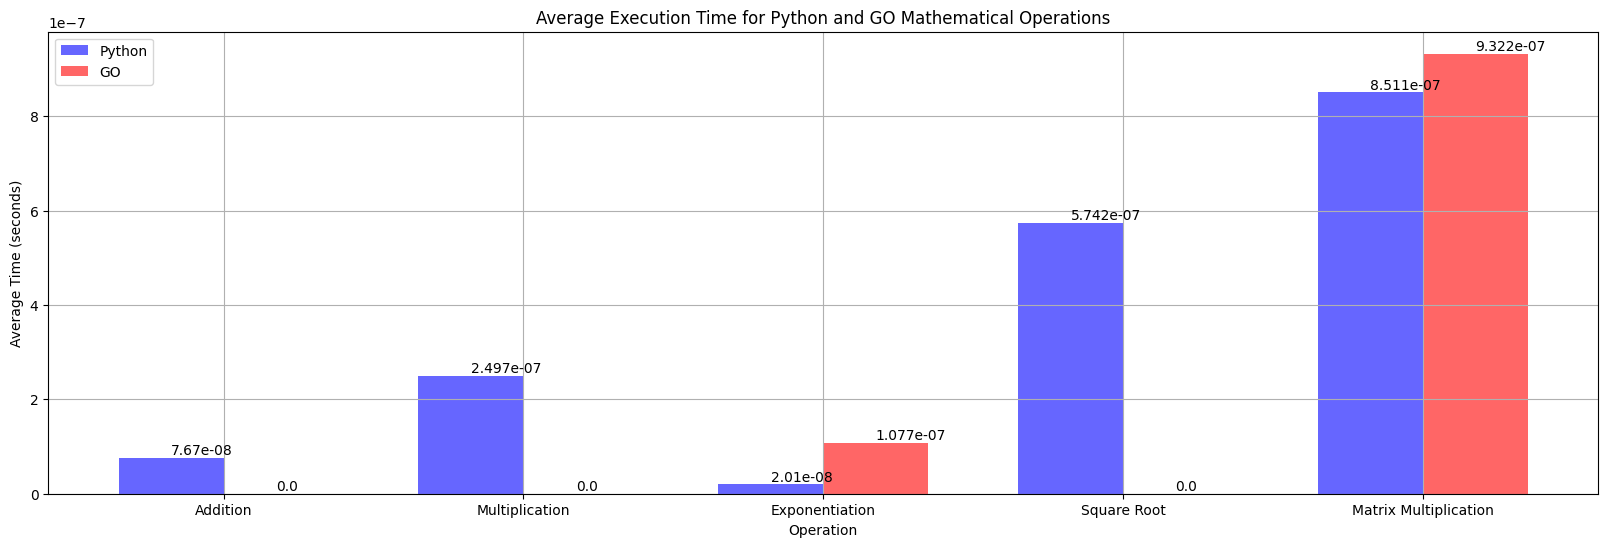

In [ ]:
import numpy as np

#PLOT Python and GO results in one graph for mathematical operations
# GO results data (copy and pasted from Go output file)
goMath_results = {
    'Operation': ['Addition', 'Multiplication', 'Exponentiation', 'Square Root', 'Matrix Multiplication'],
    'Average Time (seconds)': [0.000000e+00, 0.000000e+00, 1.077220e-07, 0.000000e+00, 9.321860e-07]
}

go_results_df = pd.DataFrame(goMath_results)

# plot the results as line chart
plt.figure(figsize=(20, 6))
plt.plot(results_df['Operation'], results_df['Average Time (seconds)'], marker='o', label='Python', color='blue')
plt.plot(go_results_df['Operation'], go_results_df['Average Time (seconds)'], marker='o', label='GO', color='red')
plt.title('Average Execution Time for Python and GO Mathematical Operations')
plt.xlabel('Operation')
plt.ylabel('Average Time (seconds)')
plt.legend()
plt.grid(True)


# plot the results as a bar chart
bar_width = 0.35
index = np.arange(len(results_df['Operation']))
plt.figure(figsize=(20, 6))
bars1 = plt.bar(index, results_df['Average Time (seconds)'], bar_width, label='Python', color='blue', alpha=0.6)
bars2 = plt.bar(index + bar_width, go_results_df['Average Time (seconds)'], bar_width, label='GO', color='red', alpha=0.6)
plt.title('Average Execution Time for Python and GO Mathematical Operations')
plt.xlabel('Operation')
plt.ylabel('Average Time (seconds)')
plt.xticks(index + bar_width / 2, results_df['Operation'])
plt.legend()

# bar labels
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 10), va='bottom')  

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 10), va='bottom') 

plt.grid(True)
plt.show()


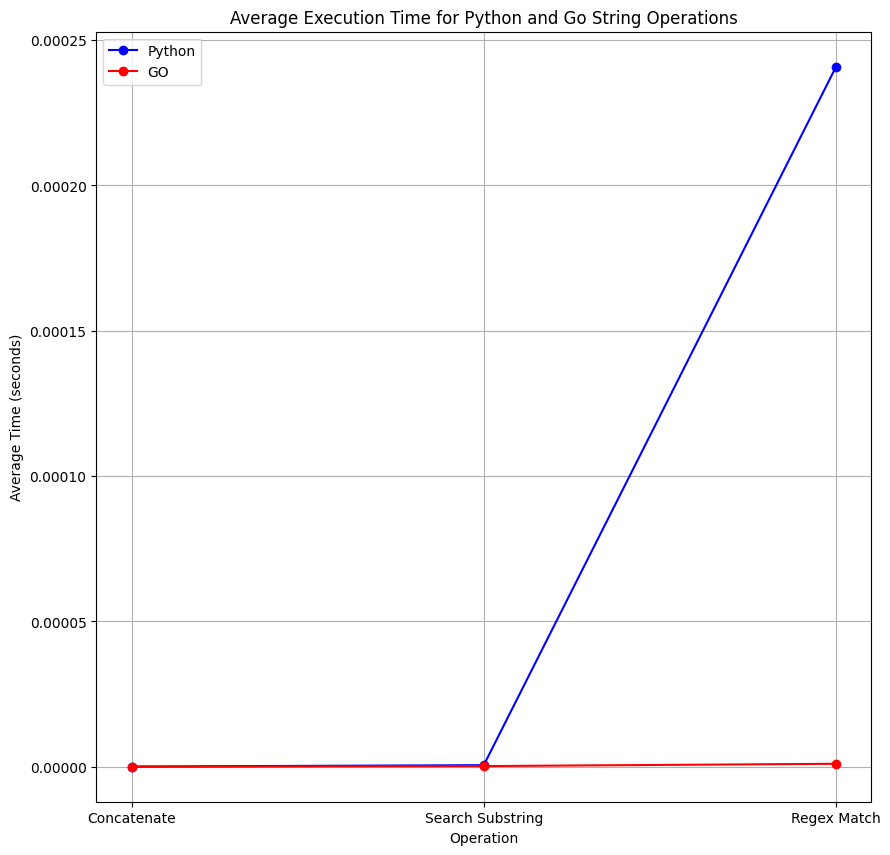

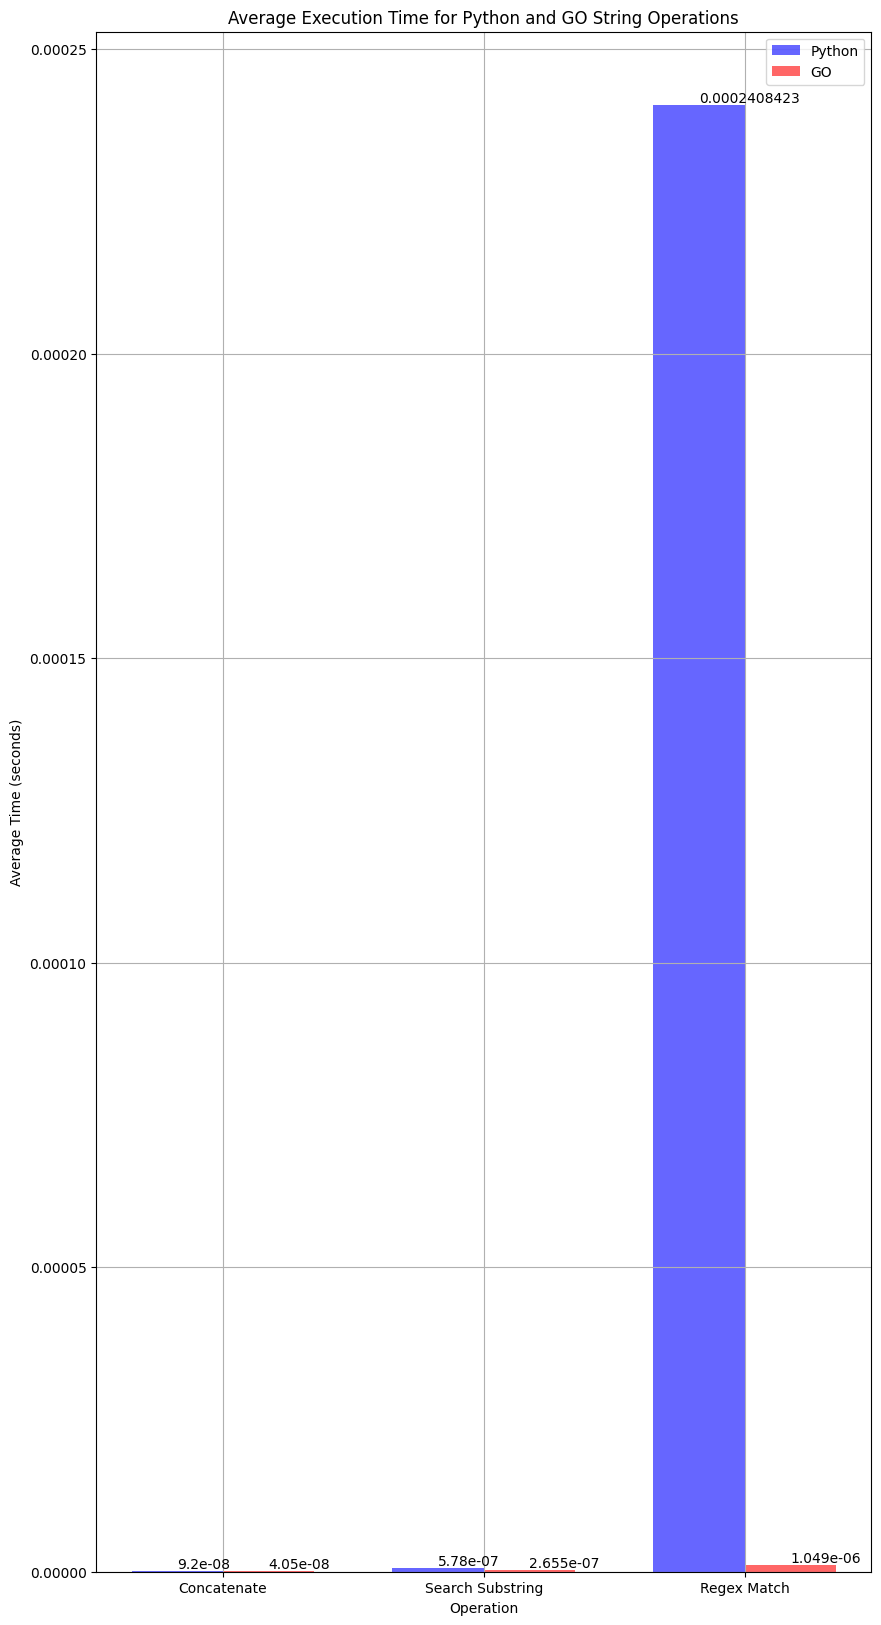

In [ ]:
# plot string results for Python and GO
Go_stringResults = {
    'Operation': ['Concatenate', 'Search Substring', 'Regex Match'],
    'Average Time (seconds)': [4.052000e-08, 2.654520e-07, 1.048991e-06]
}

Go_stringResults = pd.DataFrame(Go_stringResults)

#plot results as line chart
plt.figure(figsize=(10, 10))
plt.plot(StringResults_df['Operation'], StringResults_df['Average Time (seconds)'], marker='o', label='Python', color='blue')
plt.plot(Go_stringResults['Operation'], Go_stringResults['Average Time (seconds)'], marker='o', label='GO', color='red')
plt.title('Average Execution Time for Python and Go String Operations')
plt.xlabel('Operation')
plt.ylabel('Average Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()


# plot the results as a bar chart
bar_width = 0.35
index = np.arange(len(StringResults_df['Operation']))
plt.figure(figsize=(10, 20))
bars1 = plt.bar(index, StringResults_df['Average Time (seconds)'], bar_width, label='Python', color='blue', alpha=0.6)
bars2 = plt.bar(index + bar_width, Go_stringResults['Average Time (seconds)'], bar_width, label='GO', color='red', alpha=0.6)

plt.title('Average Execution Time for Python and GO String Operations')
plt.xlabel('Operation')
plt.ylabel('Average Time (seconds)')
plt.xticks(index + bar_width / 2, StringResults_df['Operation'])
plt.legend()
plt.grid(True)

# add labels to bar chart
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 10), va='bottom') 

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 10), va='bottom') 

plt.show()


In [99]:
go = pd.concat([go_results_df, Go_stringResults], axis=0)
print(go)

               Operation  Average Time (seconds)
0               Addition            0.000000e+00
1         Multiplication            0.000000e+00
2         Exponentiation            1.077220e-07
3            Square Root            0.000000e+00
4  Matrix Multiplication            9.321860e-07
0            Concatenate            4.052000e-08
1       Search Substring            2.654520e-07
2            Regex Match            1.048991e-06


In [100]:
go = go.rename(columns={'Average Time (seconds)': 'Go Average Time (seconds)'})
go

,Operation,Go Average Time (seconds)
0,Addition,0.000000e+00
1,Multiplication,0.000000e+00
2,Exponentiation,1.077220e-07
3,Square Root,0.000000e+00
4,Matrix Multiplication,9.321860e-07
0,Concatenate,4.052000e-08
1,Search Substring,2.654520e-07
2,Regex Match,1.048991e-06


In [101]:
PythonResults_df = PythonResults_df.rename(columns={'Average Time (seconds)': 'Python Average Time (seconds)'})
PythonResults_df

,Operation,Python Average Time (seconds)
0,Addition,7.673025e-08
1,Multiplication,2.496791e-07
2,Exponentiation,2.007008e-08
3,Square Root,5.742049e-07
4,Matrix Multiplication,8.511424e-07
0,Concatenate,9.195566e-08
1,Search Substring,5.780411e-07
2,Regex Match,2.408423e-04


In [102]:
FinalDF = pd.concat([PythonResults_df, go['Go Average Time (seconds)']], axis=1)
FinalDF

,Operation,Python Average Time (seconds),Go Average Time (seconds)
0,Addition,7.673025e-08,0.000000e+00
1,Multiplication,2.496791e-07,0.000000e+00
2,Exponentiation,2.007008e-08,1.077220e-07
3,Square Root,5.742049e-07,0.000000e+00
4,Matrix Multiplication,8.511424e-07,9.321860e-07
0,Concatenate,9.195566e-08,4.052000e-08
1,Search Substring,5.780411e-07,2.654520e-07
2,Regex Match,2.408423e-04,1.048991e-06


In [ ]:
# Calculate the percentage difference
FinalDF['Percentage Difference (%)'] = ((FinalDF['Python Average Time (seconds)'] - FinalDF['Go Average Time (seconds)']) / FinalDF['Python Average Time (seconds)']) * 100
# Add a column to indicate which language is faster
FinalDF['Fastest'] = FinalDF.apply(lambda row: 'Python' if row['Python Average Time (seconds)'] < row['Go Average Time (seconds)'] else 'Go', axis=1)

# save data frame to csv 
FinalDF.to_csv('FinalSimulationResults.csv', index=False)

End of results

In [104]:
# # plot the python mathematical results
# plt.figure(figsize=(10, 6))
# plt.plot(results_df['Operation'], results_df['Average Time (seconds)'], marker='o')
# plt.title('Average Execution Time for Python Mathematical Operations')
# plt.xlabel('Operation')
# plt.ylabel('Average Time (seconds)')
# plt.grid(True)
# plt.show()

In [105]:
# # plot the python mathematical and string results
# plt.figure(figsize=(20, 6))
# plt.plot(PythonResults_df['Operation'], PythonResults_df['Average Time (seconds)'], marker='o')
# # plt.plot(StringResults_df['Operation'], StringResults_df['Average Time (seconds)'], marker='o')
# plt.title('Average Execution Time for Python Math and Sting Operations')
# plt.xlabel('Operation')
# plt.ylabel('Average Time (seconds)')
# plt.grid(True)
# plt.show()